Grupo 7 

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import re
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from unidecode import unidecode 


In [2]:
# traigo el dataset Properatti

df_properatti= pd.read_csv('../properatti.csv',sep=',')
print(df_properatti.shape)
df_properatti.head(5)

(121220, 26)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [3]:
df_properatti['state_name'].value_counts()

state_name
Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
S

In [4]:
# nombre columnas
print(df_properatti.dtypes)


Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [5]:
# primer valor de cada columna
for column in df_properatti.columns:
    print(f"{column}: {df_properatti[column].iloc[0]}")

Unnamed: 0: 0
operation: sell
property_type: PH
place_name: Mataderos
place_with_parent_names: |Argentina|Capital Federal|Mataderos|
country_name: Argentina
state_name: Capital Federal
geonames_id: 3430787.0
lat-lon: -34.6618237,-58.5088387
lat: -34.6618237
lon: -58.5088387
price: 62000.0
currency: USD
price_aprox_local_currency: 1093959.0
price_aprox_usd: 62000.0
surface_total_in_m2: 55.0
surface_covered_in_m2: 40.0
price_usd_per_m2: 1127.2727272727273
price_per_m2: 1550.0
floor: nan
rooms: nan
expenses: nan
properati_url: http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inmobiliaria-fedele
description: 2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
title: 2 AMB TIPO CASA SIN EXPENS

In [6]:
# importo el Mapa de Argentina CON info por provincias

data_location = "./provincias/provincia.shx"
mapa_argentina = gpd.read_file(data_location)

# importo el Mapa (2) de Argentina SIN info por provincias

mundo = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
mapa_argentina_2 = mundo[mundo.name == "Argentina"]

mapa_argentina.head(24)

/var/folders/cv/c6ctbt612w9_hm1ltt9l68vc0000gn/T/ipykernel_83109/3730548221.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  mundo = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,gid,entidad,fna,gna,nam,in1,fdc,sag,geometry
0,1,0,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN,"POLYGON ((-58.45535 -34.52776, -58.45404 -34.5..."
1,2,0,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN,"POLYGON ((-70.39341 -36.15624, -70.39333 -36.1..."
2,3,0,Provincia de San Luis,Provincia,San Luis,74,Geografía,IGN,"POLYGON ((-67.05547 -31.85605, -67.05000 -31.8..."
3,4,0,Provincia de Santa Fe,Provincia,Santa Fe,82,Geografía,IGN,"POLYGON ((-61.04639 -27.99800, -61.00805 -27.9..."
4,5,0,Provincia de La Rioja,Provincia,La Rioja,46,Geografía,IGN,"POLYGON ((-68.52136 -27.81792, -68.52148 -27.8..."
5,6,0,Provincia de Catamarca,Provincia,Catamarca,10,Geografía,IGN,"POLYGON ((-68.50537 -25.16851, -68.50386 -25.1..."
6,7,0,Provincia de Tucumán,Provincia,Tucumán,90,Geografía,IGN,"POLYGON ((-65.35915 -26.05944, -65.35868 -26.0..."
7,8,0,Provincia del Chaco,Provincia,Chaco,22,Geografía,IGN,"POLYGON ((-62.32434 -24.12318, -62.31959 -24.1..."
8,9,0,Provincia de Formosa,Provincia,Formosa,34,Geografía,IGN,"POLYGON ((-62.31201 -22.48666, -62.31056 -22.4..."
9,10,0,Provincia de Santa Cruz,Provincia,Santa Cruz,78,Geografía,IGN,"MULTIPOLYGON (((-67.59361 -46.01744, -67.59357..."


<AxesSubplot:>

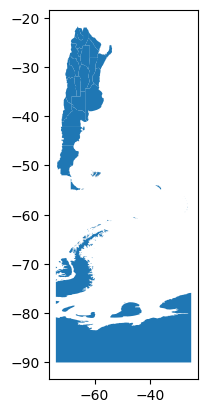

In [7]:
# este mapa trae info de provincias. 
mapa_argentina.plot()

<AxesSubplot:>

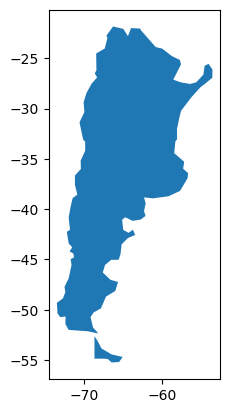

In [8]:
# este mapa no trae info de provincias (mas practico para ploteo general de todas las propiedades)

mapa_argentina_2.plot()

<AxesSubplot:>

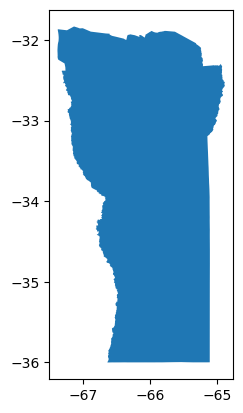

In [9]:
# ejemplo con una provincia

mapa_san_luis = mapa_argentina[mapa_argentina.fna == "Provincia de San Luis"]
mapa_san_luis.plot()

In [10]:
# Dataframe con la info sobre geonames_id

location_geonames = 'provincias/AR/AR.csv'
data_geonames = gpd.read_file(location_geonames, sep='\t')

# convierte a float64 la columna 'GEONAMEID' que es un string 

data_geonames['GEONAMEID'] = pd.to_numeric(data_geonames['GEONAMEID'], errors='coerce').astype(float)

print(data_geonames.shape)
data_geonames.head(10)

(52562, 20)


,GEONAMEID,NAME,ASCIINAME,ALTNAMES,LATITUDE,LONGITUDE,FEATCLASS,FEATCODE,COUNTRY,CC2,ADMIN1,ADMIN2,ADMIN3,ADMIN4,POPULATION,ELEVATION,GTOPO30,TIMEZONE,MODDATE,geometry
0,3427200.0,Sierra del 15,Sierra del 15,,-37.96613,-57.94670,T,HLL,AR,,01,06357,,,0.0,NaN,200,America/Argentina/Buenos_Aires,2016-01-30,POINT (-57.94670 -37.96613)
1,3427201.0,Puesto 1 Napoleón Cué,Puesto 1 Napoleon Cue,,-28.63333,-56.11667,S,HSE,AR,,06,18168,,,0.0,NaN,79,America/Argentina/Cordoba,2016-01-30,POINT (-56.11667 -28.63333)
2,3427202.0,Cañada del Zorro,Canada del Zorro,,-32.16667,-59.50000,H,STM,AR,,08,,,,0.0,NaN,65,America/Argentina/Cordoba,1993-12-21,POINT (-59.50000 -32.16667)
3,3427203.0,Estancia Zorraquín,Estancia Zorraquin,,-31.51553,-58.55208,S,RNCH,AR,,08,30113,,,0.0,NaN,71,America/Argentina/Cordoba,2016-01-30,POINT (-58.55208 -31.51553)
4,3427204.0,Estancia Zequeira Cué,Estancia Zequeira Cue,,-28.43825,-56.08838,S,RNCH,AR,,06,18168,,,0.0,NaN,98,America/Argentina/Cordoba,2016-01-30,POINT (-56.08838 -28.43825)
5,3427205.0,Arroyo Zequeira,Arroyo Zequeira,,-27.83789,-56.08614,H,STM,AR,,06,,,,0.0,NaN,96,America/Argentina/Cordoba,2011-04-19,POINT (-56.08614 -27.83789)
6,3427206.0,Zenón Videla Dorna,Zenon Videla Dorna,"Z. Videla Dorna,Zenon Videla Dorna,Zenón Videl...",-35.54208,-58.88645,P,PPL,AR,,01,06547,,,0.0,NaN,26,America/Argentina/Buenos_Aires,2023-12-11,POINT (-58.88645 -35.54208)
7,3427207.0,Zenón Roca,Zenon Roca,"Zenon Roca,Zenón Roca",-31.54708,-58.77304,P,PPL,AR,,08,30113,,,0.0,NaN,71,America/Argentina/Cordoba,2023-12-11,POINT (-58.77304 -31.54708)
8,3427208.0,Zelaya,Zelaya,Zelaya,-34.37052,-58.86938,P,PPL,AR,,01,06638,,,0.0,NaN,21,America/Argentina/Buenos_Aires,2023-12-11,POINT (-58.86938 -34.37052)
9,3427209.0,Arroyo de la Zarza,Arroyo de la Zarza,,-32.13507,-59.85856,H,STM,AR,,08,,,,0.0,NaN,62,America/Argentina/Cordoba,2011-04-19,POINT (-59.85856 -32.13507)


In [11]:
print(data_geonames.dtypes)

GEONAMEID      float64
NAME            object
ASCIINAME       object
ALTNAMES        object
LATITUDE       float64
LONGITUDE      float64
FEATCLASS       object
FEATCODE        object
COUNTRY         object
CC2             object
ADMIN1          object
ADMIN2          object
ADMIN3          object
ADMIN4          object
POPULATION     float64
ELEVATION      float64
GTOPO30          int64
TIMEZONE        object
MODDATE         object
geometry      geometry
dtype: object


In [12]:
# filtro solo el nombre de la provincia y creo una columna llamada 'provincia'

pattern = re.compile(r'/([^/]+)$') 

def cambiar_nombre(timezone):
    match = re.search(pattern, timezone)
    return match.group(1).replace('_', ' ') if match else None

data_geonames['provincia'] = data_geonames['TIMEZONE'].apply(lambda x: cambiar_nombre(x))
data_geonames.head(5)

data_geonames.provincia.isnull().sum()

data_geonames[data_geonames.provincia.isnull()].head(5)

,GEONAMEID,NAME,ASCIINAME,ALTNAMES,LATITUDE,LONGITUDE,FEATCLASS,FEATCODE,COUNTRY,CC2,...,ADMIN2,ADMIN3,ADMIN4,POPULATION,ELEVATION,GTOPO30,TIMEZONE,MODDATE,geometry,provincia
291,3427493.0,Laguna de Viedma,Laguna de Viedma,,-34.73333,-57.50000,H,LK,AR,,...,,,,0.0,NaN,-9999,,1993-12-21,POINT (-57.50000 -34.73333),None
884,3428087.0,Laguna Santo Domingo,Laguna Santo Domingo,,-38.96667,-58.81667,H,LKI,AR,,...,,,,0.0,NaN,-9999,,1993-12-21,POINT (-58.81667 -38.96667),None
2229,3429437.0,Banco Rouen,Banco Rouen,,-35.75000,-56.00000,H,SHOL,AR,,...,,,,0.0,NaN,-9999,,1993-12-21,POINT (-56.00000 -35.75000),None
2481,3429690.0,Canal Punta Indio,Canal Punta Indio,"Canal Punta Indio,Indio Channel",-35.16283,-56.96657,H,CHNM,AR,,...,,,,0.0,NaN,-9999,,2018-11-29,POINT (-56.96657 -35.16283),None
3779,3430993.0,Luis Garigiulo,Luis Garigiulo,,-39.30000,-57.30000,S,TRIG,AR,,...,,,,0.0,NaN,-9999,,1993-12-21,POINT (-57.30000 -39.30000),None


In [13]:
# cuento cuantas filas hay en df_properatti que no tienen ninguna info geografica

mask_lat_lon = np.logical_and(df_properatti['lat'].isnull(), df_properatti['lon'].isnull())
mask_latlon = df_properatti['lat-lon'].isnull()
mask_geonames = df_properatti['geonames_id'].isnull() 
combined_mask = mask_lat_lon & mask_geonames


geografia_filtered_df = df_properatti.loc[mask_lat_lon]
print("nulls en 'lat' y 'lon': " f"{geografia_filtered_df.shape}")
geografia_filtered_df = df_properatti.loc[mask_latlon]
print("nulls en 'lat-lon': " f"{geografia_filtered_df.shape}")
# 'lat', 'lon' y 'lat-lon' tienen la misma info

geografia_filtered_df = df_properatti.loc[mask_geonames]
print("nulls en 'geonames_id': " f"{geografia_filtered_df.shape}")
geografia_filtered_df = df_properatti.loc[combined_mask]
print("ninguna informacion: " f"{geografia_filtered_df.shape}")




nulls en 'lat' y 'lon': (51550, 26)
nulls en 'lat-lon': (51550, 26)
nulls en 'geonames_id': (18717, 26)
ninguna informacion: (8185, 26)


In [14]:
# Chequeo si falta algun dato de lugar(pais provincia ciudad)

df_properatti.place_with_parent_names.isnull().sum()

# Todos tienen algun tipo de informacion de lugar(pais provincia ciudad)

0

In [15]:
# Filtro los acentos
columns_2 = ['place_with_parent_names']
columns_1 = ['NAME', 'ASCIINAME']
# Create a function to remove accents from a string
def remove_accents(text):
    return unidecode(text) if pd.notna(text) else text

# Apply the function to specified columns

df_properatti[columns_2] = df_properatti[columns_2].applymap(remove_accents)
data_geonames[columns_1] = data_geonames[columns_1].applymap(remove_accents)

/var/folders/cv/c6ctbt612w9_hm1ltt9l68vc0000gn/T/ipykernel_83109/685130413.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_properatti[columns_2] = df_properatti[columns_2].applymap(remove_accents)
/var/folders/cv/c6ctbt612w9_hm1ltt9l68vc0000gn/T/ipykernel_83109/685130413.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_geonames[columns_1] = data_geonames[columns_1].applymap(remove_accents)


In [16]:
# Busca un string
substring_to_search = 'Tucuman'

# Creo mascara booleana
substring_mask = data_geonames['NAME'].str.contains(substring_to_search, case=False)
print(data_geonames[substring_mask].shape)
data_geonames[substring_mask]

(18, 21)


,GEONAMEID,NAME,ASCIINAME,ALTNAMES,LATITUDE,LONGITUDE,FEATCLASS,FEATCODE,COUNTRY,CC2,...,ADMIN2,ADMIN3,ADMIN4,POPULATION,ELEVATION,GTOPO30,TIMEZONE,MODDATE,geometry,provincia
10935,3833574.0,El Tucumancito,El Tucumancito,"El Tucumancito,Tucumancito",-22.85268,-62.26805,P,PPL,AR,,...,34063,,,0.0,NaN,161,America/Argentina/Cordoba,2023-08-15,POINT (-62.26805 -22.85268),Cordoba
10936,3833575.0,Tucumancito,Tucumancito,,-23.22096,-63.66633,L,LCTY,AR,,...,,,,0.0,NaN,265,America/Argentina/Salta,2011-04-19,POINT (-63.66633 -23.22096),Salta
10937,3833576.0,Banado de Tucumanao,Banado de Tucumanao,,-28.09342,-66.56525,H,MRSH,AR,,...,,,,0.0,NaN,755,America/Argentina/Catamarca,2011-04-19,POINT (-66.56525 -28.09342),Catamarca
10938,3833577.0,Tucumanao,Tucumanao,"Tucumana,Tucumanao",-28.08217,-66.56162,P,PPL,AR,,...,10084,,,0.0,NaN,735,America/Argentina/Catamarca,2023-10-06,POINT (-66.56162 -28.08217),Catamarca
10939,3833578.0,Tucuman Province,Tucuman Province,"Provincia de Tucuman,Provincia de Tucumán,TM,T...",-27.00000,-65.50000,A,ADM1,AR,,...,,,,1703186.0,NaN,551,America/Argentina/Tucuman,2023-02-15,POINT (-65.50000 -27.00000),Tucuman
14211,3836873.0,San Miguel de Tucuman,San Miguel de Tucuman,"San Migel De Tukuman,San Migel de Tukuman,San ...",-26.82414,-65.22260,P,PPLA,AR,,...,90084,,,548866.0,NaN,452,America/Argentina/Tucuman,2022-12-14,POINT (-65.22260 -26.82414),Tucuman
24695,3847407.0,Estancia La Tucumana,Estancia La Tucumana,,-32.49989,-63.22181,S,RNCH,AR,,...,14042,,,0.0,NaN,197,America/Argentina/Cordoba,2016-01-30,POINT (-63.22181 -32.49989),Cordoba
44643,6507925.0,Nh Grand Hotel Del Tucuman,Nh Grand Hotel Del Tucuman,,-26.81660,-65.21660,S,HTL,AR,,...,90084,,,0.0,NaN,459,America/Argentina/Tucuman,2016-01-30,POINT (-65.21660 -26.81660),Tucuman
45060,6956278.0,tucuman center,tucuman center,,-26.82802,-65.20385,S,HTL,AR,,...,90084,,,0.0,NaN,451,America/Argentina/Tucuman,2016-01-30,POINT (-65.20385 -26.82802),Tucuman
45079,6956304.0,forcadell suipacha y tucuman,forcadell suipacha y tucuman,,-34.60130,-58.37955,S,HTL,AR,,...,02001,,,0.0,NaN,31,America/Argentina/Buenos_Aires,2017-05-08,POINT (-58.37955 -34.60130),Buenos Aires


In [17]:
# Renombro las columnas 'state_name', 'place_name' y 'country_name'

"""df_properatti.rename(columns={'state_name': 'provincia'}, inplace=True)
df_properatti.rename(columns={'place_name': 'ciudad'}, inplace=True)
df_properatti.rename(columns={'country_name': 'pais'}, inplace=True)
df_properatti.head(10)"""

"df_properatti.rename(columns={'state_name': 'provincia'}, inplace=True)\ndf_properatti.rename(columns={'place_name': 'ciudad'}, inplace=True)\ndf_properatti.rename(columns={'country_name': 'pais'}, inplace=True)\ndf_properatti.head(10)"

In [18]:
# Limpio la columna 'place_with_parent_name' y creo columnas con info de 'provincia', 'ciudad' y 'barrio'

import re

pattern = re.compile(r'\|(?P<pais>[^|]+)\|(?P<provincia>[^|]+)(?:\|(?P<ciudad>[^|]+))?(?:\|(?P<barrio>[^|]+))?')

def extract_parts(location_info):
    match = pattern.match(location_info)
    return {'provincia': match.group('provincia') if match else None, 'ciudad': match.group('ciudad') if match else None, 'barrio': match.group('barrio') if match else None}

df_properatti[['provincia', 'ciudad', 'barrio']] = df_properatti['place_with_parent_names'].apply(
    lambda x: pd.Series(extract_parts(x))
)




In [19]:
# Capital Federal queda dentro de la Provincia de Buenos Aires

def clean_capital(row):
    if row['provincia'] == 'Capital Federal':
        row['provincia'] = 'Buenos Aires'
        row['barrio'] = row['ciudad']
        row['ciudad'] = 'Ciudad Autónoma de Buenos Aires'
    return row

df_properatti = df_properatti.apply(clean_capital, axis=1)
df_properatti.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,provincia,ciudad,barrio
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,Buenos Aires,Ciudad Autónoma de Buenos Aires,Mataderos
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,Bs.As. G.B.A. Zona Sur,La Plata,None
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,Buenos Aires,Ciudad Autónoma de Buenos Aires,Mataderos
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,Buenos Aires,Ciudad Autónoma de Buenos Aires,Liniers
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlantica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,Buenos Aires Costa Atlantica,Mar del Plata,Centro


In [20]:
df_properatti['provincia'].value_counts()

provincia
Buenos Aires                    32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Cordoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlantica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Rio Negro                         808
Neuquen                           733
Mendoza                           681
Tucuman                           674
Corrientes                        583
Misiones                          464
Entre Rios                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
Sa

In [21]:
# Uso regex para limpiar Bs.As. y demas formas de Buenos Aires.
pattern = re.compile(r'(?P<provincia>Bs\.As\.|Buenos Aires)\s(?P<partido>.+)')

def match_location(location_info):
    if pd.isna(location_info):  # Check for missing values
        return pd.Series({'provincia': None, 'partido': None})

    match = pattern.match(location_info)
    if match:
        provincia = 'Buenos Aires'
        partido = match.group('partido')
        return pd.Series({'provincia': provincia, 'partido': partido})
    else:
        return pd.Series({'provincia': location_info, 'partido': None})


df_properatti[['provincia', 'partido']] = df_properatti['provincia'].apply(match_location)

In [22]:
df_properatti[['provincia','partido']].value_counts()

provincia     partido          
Buenos Aires  G.B.A. Zona Norte    25560
              G.B.A. Zona Sur      13952
              Costa Atlantica      10006
              G.B.A. Zona Oeste     9322
              Interior              2291
Name: count, dtype: int64

In [23]:
df_properatti[df_properatti['provincia'] == 'Buenos Aires']['ciudad'].value_counts()

ciudad
Ciudad Autónoma de Buenos Aires    32316
Tigre                               8983
Mar del Plata                       7710
Vicente Lopez                       3663
Lomas de Zamora                     3470
                                   ...  
Reta                                   1
Laprida                                1
Villarino                              1
Mar de Cobo                            1
General Paz                            1
Name: count, Length: 128, dtype: int64

In [24]:
df_properatti['ciudad'].value_counts()

ciudad
Ciudad Autónoma de Buenos Aires    32316
Tigre                               8983
Rosario                             8504
Mar del Plata                       7710
Cordoba                             6606
                                   ...  
General Lavalle                        1
Venado Tuerto                          1
Santa Ana                              1
Carolina                               1
Malabrigo                              1
Name: count, Length: 483, dtype: int64

In [25]:
df_properatti[df_properatti[['lat', 'lon']].isnull().any(axis=1)][['lat', 'lon']].shape


(51550, 2)

In [26]:
# busca los valores de 'geonames_id' en el dataframe 'data_geonames'
# cuando los encuentra, se trae el valor de las columnas 'LATITUDE' y 'LONGITUDE'

def normalize_geonameid(row):
    if pd.isnull(row['lat']) and pd.isnull(row['lon']):
        geoname_id = row['geonames_id']
        if geoname_id in data_geonames['GEONAMEID'].values:
            matching_row = data_geonames[data_geonames['GEONAMEID'] == geoname_id]
            if not matching_row.empty:
                row.loc['lat'] = matching_row['LATITUDE'].iloc[0]
                row.loc['lon'] = matching_row['LONGITUDE'].iloc[0]
               
    return row

df_properatti = df_properatti.apply(normalize_geonameid, axis=1)

In [27]:
df_properatti[df_properatti[['lat', 'lon']].isnull().any(axis=1)][['lat', 'lon']].shape

(8346, 2)

In [28]:
# Si  no hay info de 'lat' o 'lon', me traigo los valores 'LATITUDE' y 'LONGITUDE' de data_geonames que matcheen con la ciudad

def find_ciudad_province_in_data_geonames(row):
    if pd.isnull(row['lat']) and pd.isnull(row['lon']):
        ciudad = row['ciudad']
        matching_rows = data_geonames[data_geonames['NAME'].isin([ciudad])]

        if not matching_rows.empty:
            matching_row = matching_rows.iloc[0]
            row['lat'] = pd.to_numeric(matching_row['LATITUDE']).astype(float) 
            row['lon'] = pd.to_numeric(matching_row['LONGITUDE']).astype(float)
       
    return row

df_properatti = df_properatti.apply(find_ciudad_province_in_data_geonames, axis=1)

In [29]:
print(df_properatti[pd.isnull(df_properatti['lat']) & pd.isnull(df_properatti['lon'])][['lat', 'lon']].shape)

(798, 2)


In [30]:
# Si  no hay info de 'lat' o 'lon', me traigo los valores 'LATITUDE' y 'LONGITUDE' de data_geonames que matcheen con la provincia 

def find_ciudad_province_in_data_geonames(row):
    if pd.isnull(row['lat']) and pd.isnull(row['lon']):
        provincia = row['provincia']
        matching_rows = data_geonames[data_geonames['provincia'].isin([provincia])]

        if not matching_rows.empty:
            matching_row = matching_rows.iloc[0]
            row['lat'] = pd.to_numeric(matching_row['LATITUDE']).astype(float) 
            row['lon'] = pd.to_numeric(matching_row['LONGITUDE']).astype(float)

    return row

df_properatti = df_properatti.apply(find_ciudad_province_in_data_geonames, axis=1)

In [31]:
print(df_properatti[pd.isnull(df_properatti['lat']) & pd.isnull(df_properatti['lon'])][['lat', 'lon']].shape)
df_properatti[pd.isnull(df_properatti['lat']) & pd.isnull(df_properatti['lon'])]['title'].value_counts()

(0, 2)


Series([], Name: count, dtype: int64)

In [39]:
def fix_tucuman(row):
    if pd.isnull(row['lat']) and pd.isnull(row['lon']):
        row['ciudad'] = 'San Miguel de Tucuman'
        row['lat'] = -26.82414
        row['lon'] = -65.22260
        
    return row

df_properatti = df_properatti.apply(fix_tucuman, axis=1)

In [33]:
# Filtro los que no tienen info geografica (no hay match en data_geonames)

mask_not_null = np.logical_and(~pd.isnull(df_properatti['lat']),~pd.isnull(df_properatti['lon']))

df_properatti_for_plot = df_properatti[mask_not_null]

df_properatti_for_plot.shape

(121220, 30)

In [34]:
# creo un geoDataFrame con la info geografica 
geometry = gpd.points_from_xy(pd.to_numeric(df_properatti_for_plot.lon), pd.to_numeric(df_properatti_for_plot.lat))
geometry

df_properatti = gpd.GeoDataFrame(df_properatti_for_plot, geometry=geometry)


# outlier corregido

df_properatti.at[9761, 'geometry'] = Point(-64.00000, -32.00000)


In [35]:
#GeoDataFrame final con toda la info de geografia, sin valores nulos

df_properatti_final_geografia = df_properatti[['title','place_with_parent_names','provincia','ciudad','barrio','partido','geometry']]
print("Shape: " , df_properatti_final_geografia.shape)
print("total nulos: ", df_properatti_final_geografia['geometry'].isnull().sum())
df_properatti_final_geografia.sample(10)



Shape:  (121220, 7)
total nulos:  0


,title,place_with_parent_names,provincia,ciudad,barrio,partido,geometry
14093,Depto de 3 ambientes en Edificio Torre de muy ...,|Argentina|Capital Federal|Caballito|,Buenos Aires,Ciudad Autónoma de Buenos Aires,Caballito,None,POINT (-58.44090 -34.63584)
8299,Luminoso Monoambiente Piso 8 en Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Buenos Aires,Ciudad Autónoma de Buenos Aires,Barrio Norte,None,POINT (-58.40358 -34.58863)
42759,"Casa 601m², Tigre, Nordelta, por U$S 450.000",|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Buenos Aires,Tigre,Nordelta,G.B.A. Zona Norte,POINT (-58.57962 -34.42603)
103804,Departamento - La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Buenos Aires,La Plata,None,G.B.A. Zona Sur,POINT (-58.00000 -35.00000)
77399,DEPARTAMENTO EN VENTA,|Argentina|Bs.As. G.B.A. Zona Oeste|Moron|Cast...,Buenos Aires,Moron,Castelar,G.B.A. Zona Oeste,POINT (-58.64317 -34.65215)
89844,Calamuchita Punta Serrana 4500m2 terreno 2 dor...,|Argentina|Cordoba|,Cordoba,None,None,None,POINT (-64.00000 -32.00000)
84840,Departamento - Playa Grande,|Argentina|Buenos Aires Costa Atlantica|Mar de...,Buenos Aires,Mar del Plata,Playa Grande,Costa Atlantica,POINT (-62.76665 -30.89967)
112328,Departamento - San Telmo,|Argentina|Capital Federal|San Telmo|,Buenos Aires,Ciudad Autónoma de Buenos Aires,San Telmo,None,POINT (-58.37122 -34.62000)
110427,MUY LUMINOSO // SAN MARTIN 900,|Argentina|Capital Federal|San Nicolas|,Buenos Aires,Ciudad Autónoma de Buenos Aires,San Nicolas,None,POINT (-58.38333 -34.60001)
57375,CHALET 4 AMBIENTES,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,Buenos Aires,General San Martin,Villa Ballester,G.B.A. Zona Norte,POINT (-58.55919 -34.54531)


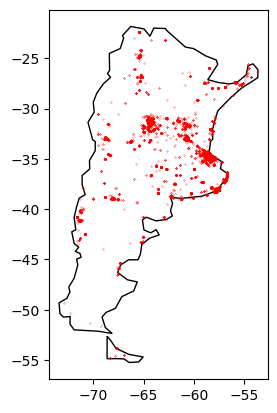

In [36]:
# Mapa de Argentina
ax = mapa_argentina_2.plot(color='white', edgecolor='black')

# Sobre las ciudades superpone el mapa del país
df_properatti.plot(ax=ax, color='red', markersize=0.05)

plt.show()

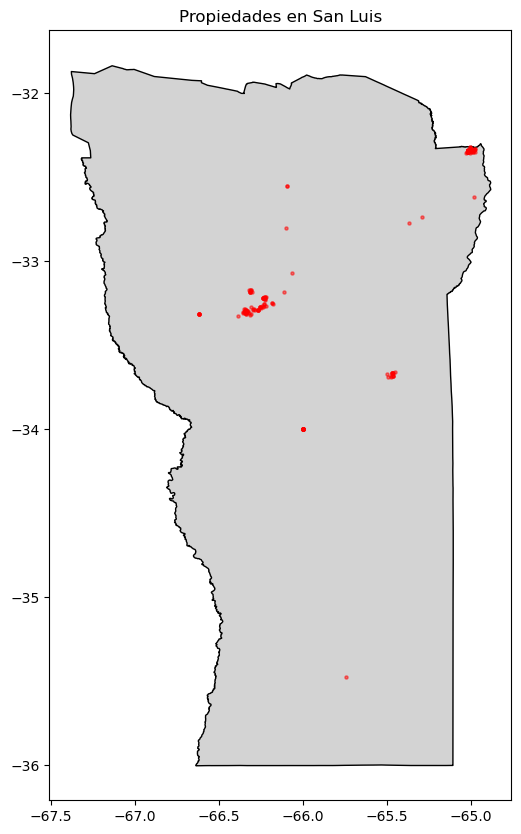

In [37]:
# filtro los puntos que estan dentro de 'mapa_san_luis' 

contained_points = df_properatti[df_properatti.geometry.within(mapa_san_luis.unary_union)]

# plot del mapa_san_luis
ax = mapa_san_luis.plot(figsize=(10, 10), color='lightgray', edgecolor='black')
contained_points.plot(ax=ax, color='red', marker='o', markersize=5, alpha=0.5)
plt.title('Propiedades en San Luis')
plt.show()

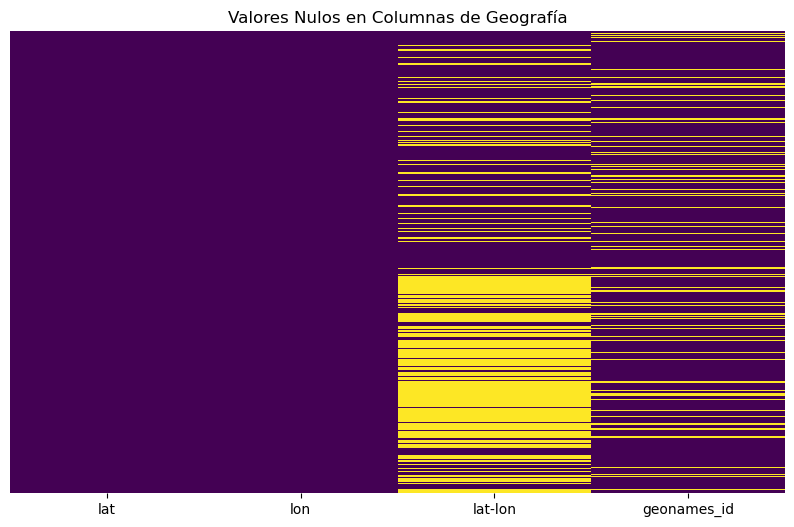

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (tu código anterior)

# Crear un DataFrame con los valores nulos para plotear
nulls_df = df_properatti[['lat', 'lon', 'lat-lon', 'geonames_id']].isnull()

# Plotear los valores nulos
plt.figure(figsize=(10, 6))
sns.heatmap(nulls_df, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Valores Nulos en Columnas de Geografía')
plt.show()
